# Import 

## Library 

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#train test split
from sklearn.model_selection import train_test_split

# Standar Scaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

#Calculate the Accuracy
from sklearn.metrics import accuracy_score

#Make cross validation
from sklearn.model_selection import cross_val_score

#Calculate the Area bellow Curve
from sklearn.metrics import roc_curve, auc

# Metrix
from sklearn import metrics

#Does the Gridsearch
from sklearn.model_selection import GridSearchCV

#Confussion Matrix 
from sklearn.metrics import confusion_matrix


# 3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import plotly.express as py 

# Missin Analysis
import missingno as msno

# For make 3d Grafic
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt

# Suport Vector Regressor
from sklearn.svm import SVR

## DataSet

O - Obtaining our data 

S - Scrubbing / Cleaning our data

E - Exploring / Visualizing our data will allow us to find patterns and trends

M - Modeling our data will give us our predictive power as a wizard

N - INterpreting our data

In [99]:
df = pd.read_csv('housing_edf82b23-51e2-4f57-887d-6be67da34d27.data',header=None, sep='\s+')
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

In [100]:
df.shape

(506, 14)

In [101]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [102]:
# df.Pregnancies.unique()

# EDA

## See types,columns, nulls, memory 

In [103]:
df.shape

(506, 14)

In [104]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [105]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## Describe

DataFrame.describe() method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns unless parameter include="all" is passed.

Now, let's understand the statistics that are generated by the __describe()__ method:

**count tells us the number of NoN-empty rows in a feature.**

**mean tells us the mean value of that feature.**

**std tells us the Standard Deviation Value of that feature.**

**min tells us the minimum value of that feature.**

**25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.**

**max tells us the maximum value of that feature.**


In [106]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


For reference: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe

In [107]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


To fill these Nan values the data distribution needs to be understood

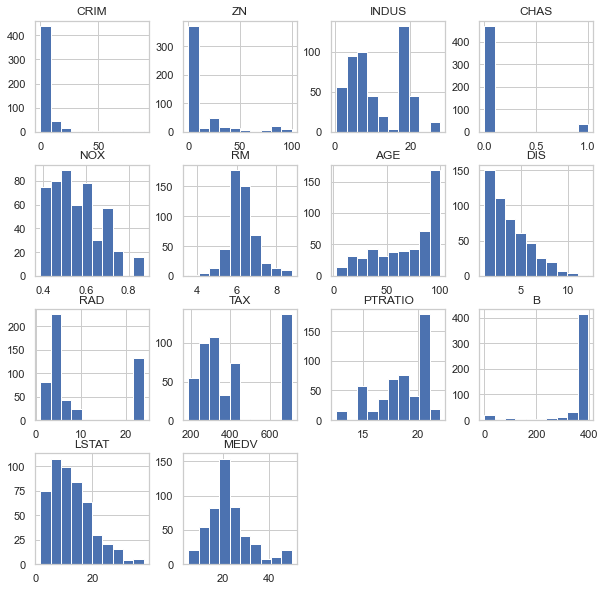

In [108]:
p = df.hist(figsize = (10,10))

### Skewness

A left-skewed distribution has a long left tail. Left-skewed distributions are also called negatively-skewed distributions. That’s because there is a long tail in the negative direction on the number line. The mean is also to the left of the peak.

A right-skewed distribution has a long right tail. Right-skewed distributions are also called positive-skew distributions. That’s because there is a long tail in the positive direction on the number line. The mean is also to the right of the peak.



to learn more about skewness
https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/skewed-distribution/

In [109]:
df.shape

(506, 14)

## Dtypes

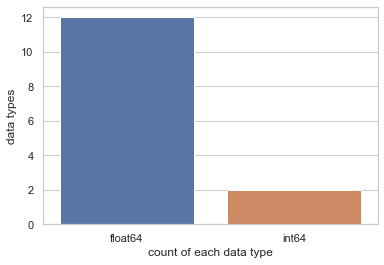

In [110]:
sns.countplot(df.dtypes.map(str))
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

## Missingno  analysis

### describe

In [111]:
df.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     8 non-null      float64
 1   ZN       8 non-null      float64
 2   INDUS    8 non-null      float64
 3   CHAS     8 non-null      float64
 4   NOX      8 non-null      float64
 5   RM       8 non-null      float64
 6   AGE      8 non-null      float64
 7   DIS      8 non-null      float64
 8   RAD      8 non-null      float64
 9   TAX      8 non-null      float64
 10  PTRATIO  8 non-null      float64
 11  B        8 non-null      float64
 12  LSTAT    8 non-null      float64
 13  MEDV     8 non-null      float64
dtypes: float64(14)
memory usage: 960.0+ bytes


### isna

This returns a summary of how many missing values are contained within the dataframe. The isna() part detects missing values within the dataframe and returns a Boolean value for each element in the dataframe. The sum() part sums up the number of True values.

The following information is returned by this line.

In [112]:
df.isna().sum().sort_values( ascending = True )

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

The barplot provides a simple plot where each bar represents a column within the dataframe. The height of the bar indicates how complete that column is, i.e, how many non-null values are present. It can be generated by calling upon:

### bar

The barplot provides a simple plot where each bar represents a column within the dataframe. The height of the bar indicates how complete that column is, i.e, how many non-null values are present. It can be generated by calling upon:

<AxesSubplot:>

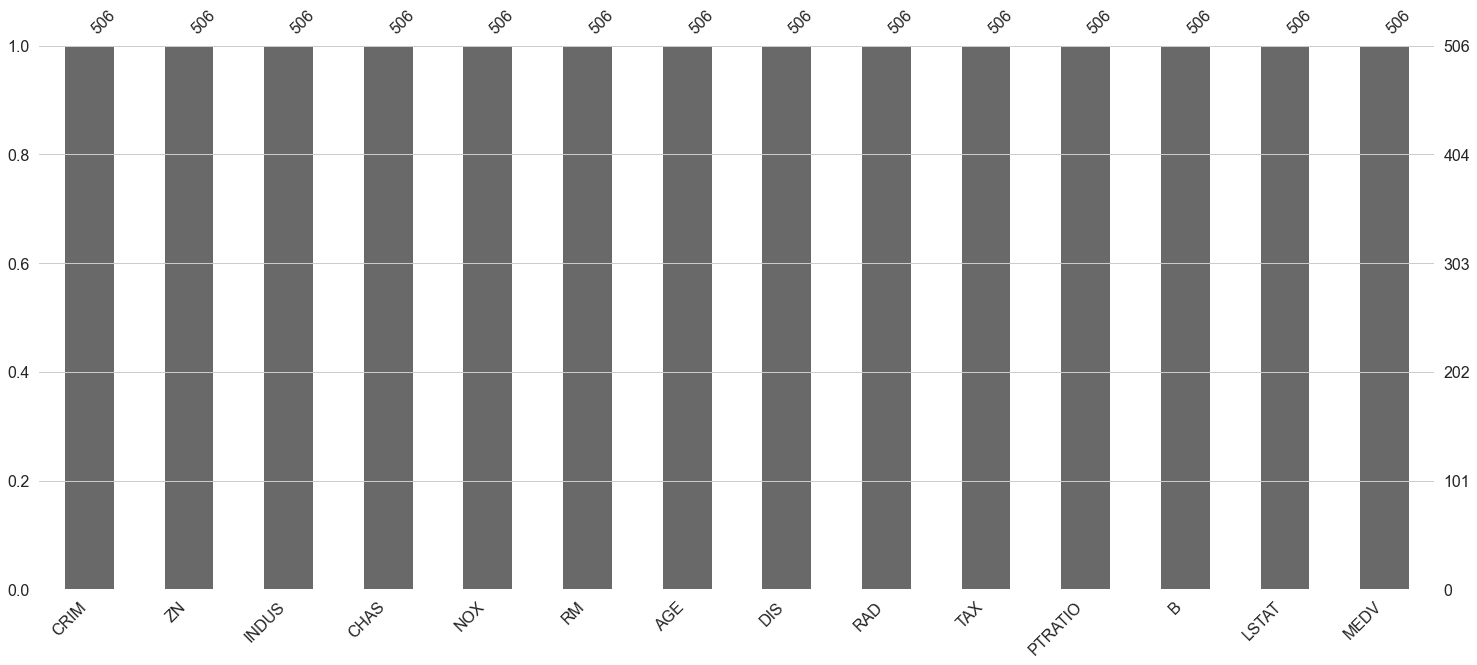

In [113]:
msno.bar(df)

### Matrix Analysis

The matrix plot is a great tool if you are working with depth-related data or time-series data. It provides a colour fill for each column. When data is present, the plot is shaded in grey (or your colour of choice), and when it is absent the plot is displayed in white.

The matrix plot can be generated by calling upon:

<AxesSubplot:>

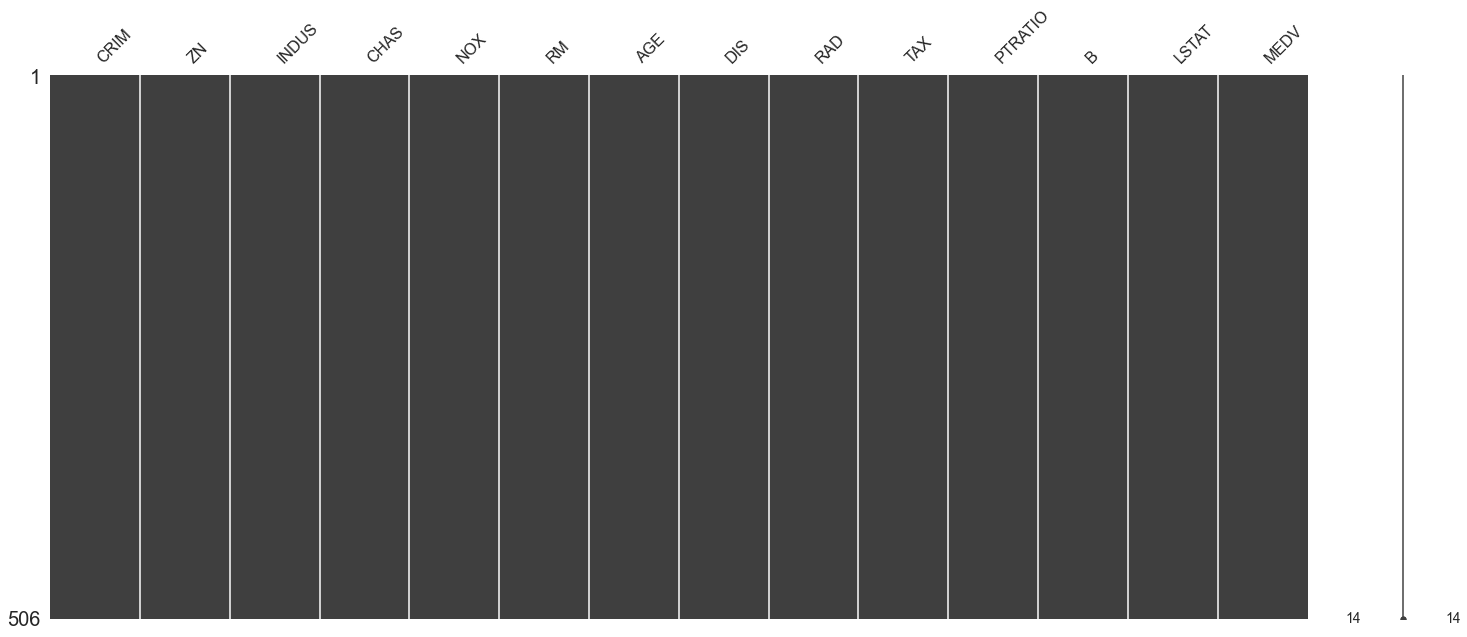

In [114]:
msno.matrix(df)

### Heatmap


The heatmap is used to identify correlations of the nullity between each of the different columns. In other words, it can be used to identify if there is a relationship in the presence of null values between each of the columns.

Values close to positive 1 indicate that the presence of null values in one column is correlated with the presence of null values in another column.

Values close to negative 1 indicate that the presence of null values in one column is anti-correlated with the presence of null values in another column. In other words, when null values are present in one column, there are data values present in the other column, and vice versa.

Values close to 0, indicate there is little to no relationship between the presence of null values in one column compared to another.

There are a number of values that show as <-1. This indicates that the correlation is very close to being 100% negative.

The heatmap can be generated by the following code:

<AxesSubplot:>

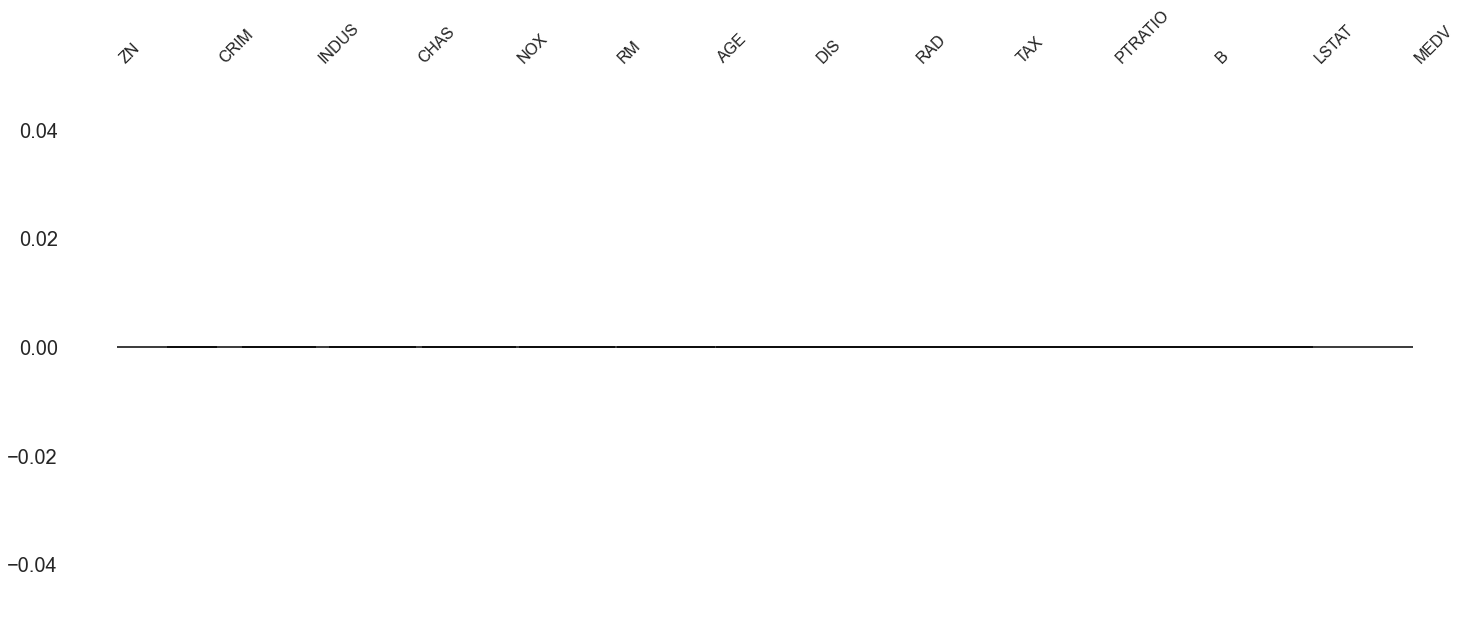

In [115]:
msno.dendrogram(df)

## balance of the data

In [116]:
# sns.countplot(x = 'Outcome', data = df_copy)

In [117]:
df.columns.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype=object)

## PairPLot

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.¶
For Reference: https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

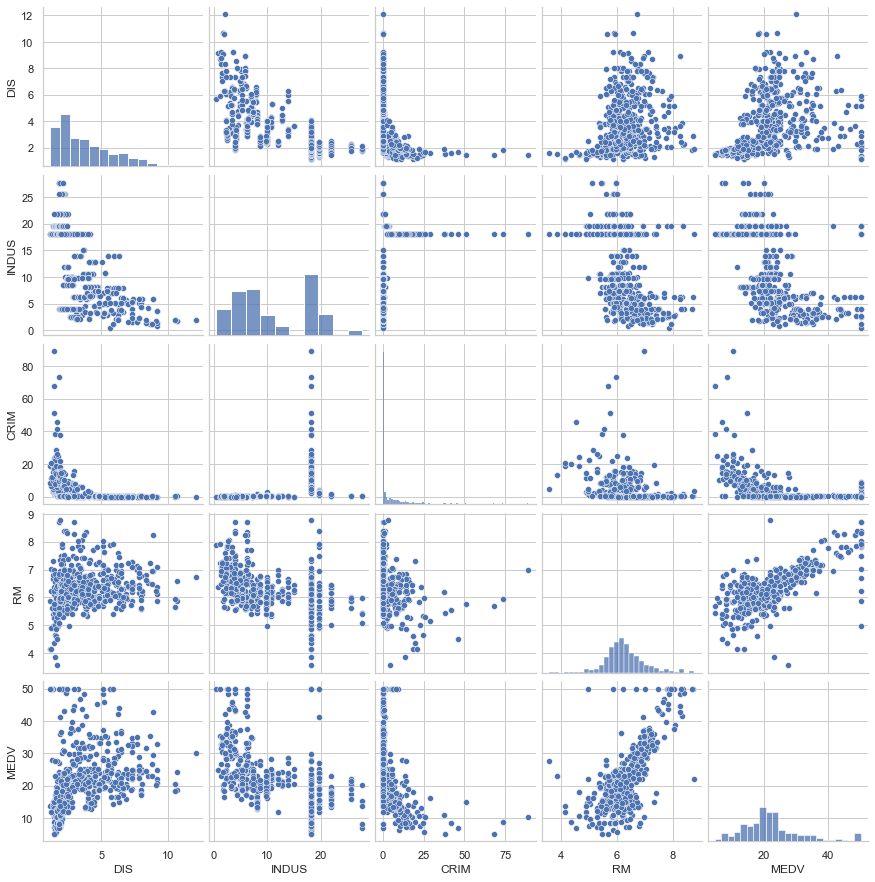

In [118]:
sns.set( style = 'whitegrid', context = 'notebook')
columns = ['DIS','INDUS','CRIM', 'RM',  'MEDV']
sns.pairplot(df[columns], height=2.5)
plt.show()

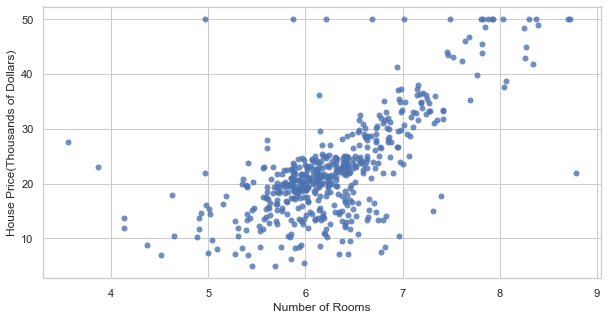

In [141]:
# Un scatter plot para visualizar dos variables
fig, (ax0) = plt.subplots(1,1,figsize=(10,5))
g=sns.scatterplot(x = "RM", y = "MEDV", data = df, linewidth=0, alpha = 0.8,ax=ax0)
plt.xlabel('Number of Rooms')
plt.ylabel('House Price(Thousands of Dollars)')
plt.show()

## Correlation Matrix

Pearson's Correlation Coefficient: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

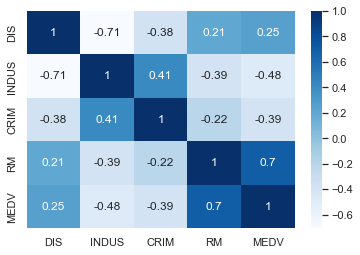

In [122]:
plt.figure()
a = sns.heatmap( df[columns].corr(),annot=True,cmap ='Blues' )
plt.show()

## Define X e Y

In [123]:
X = df['RM'].values.reshape(-1,1)
y = df['MEDV'].values.reshape(-1,1)

# Support Vector Regression

## split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Create Scaler Object and Transform

In [125]:
# Create Object Scaler
X_scal_obj = StandardScaler().fit(X_train)
y_scal_obj = StandardScaler().fit(y_train)

# Transfor data
X_train_scal = X_scal_obj.transform( X_train )
X_test_scal  = X_scal_obj.transform( X_test  )
y_train_scal = y_scal_obj.transform( y_train )
y_test_scal  = y_scal_obj.transform( y_test  )

## GridSearchCV

In [135]:
model = SVR()

para = {'C':  [1, 10,20],
        'gamma': np.linspace(0.001,5,3),
        'epsilon': np.linspace(1,4,3),
        'kernel': ("rbf", "poly", "sigmoid")}

# GridSearchCV will replace n_neighbors by values in param_grid.
clf = GridSearchCV( model,
                    param_grid = para, 
                    cv = 5, n_jobs = -1, 
                    verbose = 2, 
                    scoring="neg_mean_squared_error",
                    refit=True)

clf.fit( X_train_scal , y_train_scal )

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 10, 20], 'epsilon': array([1. , 2.5, 4. ]),
                         'gamma': array([1.0000e-03, 2.5005e+00, 5.0000e+00]),
                         'kernel': ('rbf', 'poly', 'sigmoid')},
             scoring='neg_mean_squared_error', verbose=2)

## Best Estimator

In [136]:
clf.best_estimator_

SVR(C=10, epsilon=1.0, gamma=2.5004999999999997)

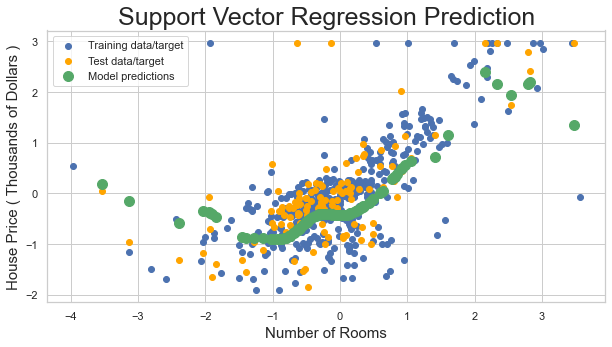

In [156]:
plt.figure( figsize=(10,5))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
plt.scatter(X_train_scal, y_train_scal,color = 'b',linewidths=1)
plt.scatter(X_test_scal,  y_test_scal, color = 'orange',linewidths=1)
plt.plot(X_test_scal,  clf.predict(X_test_scal) ,'.', color = 'g',markersize =20)
plt.xlabel('Number of Rooms',fontsize=15)
plt.ylabel('House Price ( Thousands of Dollars )',fontsize=15)
plt.title('Support Vector Regression Prediction',fontsize=25)
plt.legend(["Training data/target","Test data/target","Model predictions"], loc="best")
plt.legend(["Training data/target","Test data/target","Model predictions"], loc="best")
plt.legend(["Training data/target","Test data/target","Model predictions"], loc="best")

In [130]:
n_room = 7
n_room_std = X_scal_obj.transform( np.array(n_room).reshape(-1, 1) )
print(f'El precio de una casa con { n_room } habitaciones es de :{ float(y_scal_obj.inverse_transform(clf.predict(n_room_std).reshape(-1, 1))):.2f}' )

El precio de una casa con 7 habitaciones es de :28.00


### Predict

In [131]:
y_pred = clf.predict(X_test_scal)
# y_pred

## Performance Metrics

### score

In [163]:
clf.score(X, y)

-579.883891885108

### R2

In [132]:
r2 = metrics.r2_score(y_test_scal,y_pred)
print(f'R2 : { r2.round(4)} ')

R2 : 0.4418 


### MSE

In [133]:
mse = metrics.mean_squared_error(y_test_scal,y_pred)
print(f'MSE : { mse.round(4)} ')

MSE : 0.5346 
